This data was extracted from the census bureau database found at http://www.census.gov/ftp/pub/DES/www/welcome.html <br>
Donor: Ronny Kohavi and Barry Becker, Data Mining and Visualization Silicon Graphics. <br>
e-mail: ronnyk@sgi.com for questions. <br>
Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random). <br>
48842 instances, mix of continuous and discrete (train=32561, test=16281) <br>
45222 if instances with unknown values are removed (train=30162, test=15060) <br>
Duplicate or conflicting instances : 6 <br>
Class probabilities for adult.all file <br>
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns) <br>
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns) <br>
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: <br>
((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) <br> <br>
Prediction task is to determine whether a person makes over 50K a year. Conversion of original data as follows: <br>
1. Discretized a gross income into two ranges with threshold 50,000. <br>
2. Convert U.S. to US to avoid periods. <br>
3. Convert Unknown to "?" <br>
4. Run MLC++ GenCVFiles to generate data,test. <br> <br>

Description of fnlwgt (final weight) <br>
The weights on the CPS files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. <br>
These are: <br>
1. A single cell estimate of the population 16+ for each state. <br>
2. Controls for Hispanic Origin by age and sex. <br>
3. Controls by Race, age and sex. <br> <br>

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. <br>
The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state. <br> <br>
Dataset Link <br>
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/ <br>

Problem 1: <br>
Prediction task is to determine whether a person makes over 50K a year. <br>
Problem 2: <br>
Which factors are important <br>
Problem 3: <br>
Which algorithms are best for this dataset <br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
data.columns = col_labels
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


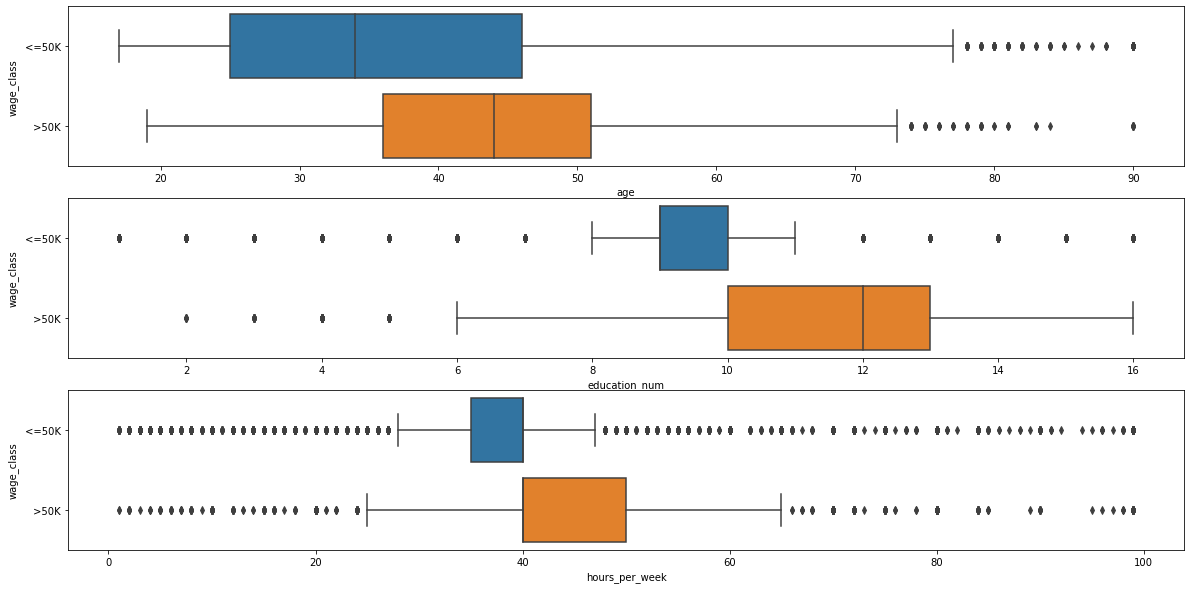

In [4]:
col = ['age','education_num','hours_per_week']

fig,ax = plt.subplots(3,1,figsize=(20,10))

for i in range(0,3):
    c = col[i]
    sns.boxplot(x=data[c],y='wage_class',data=data,ax=ax[i])

<AxesSubplot:xlabel='capital_loss', ylabel='count'>

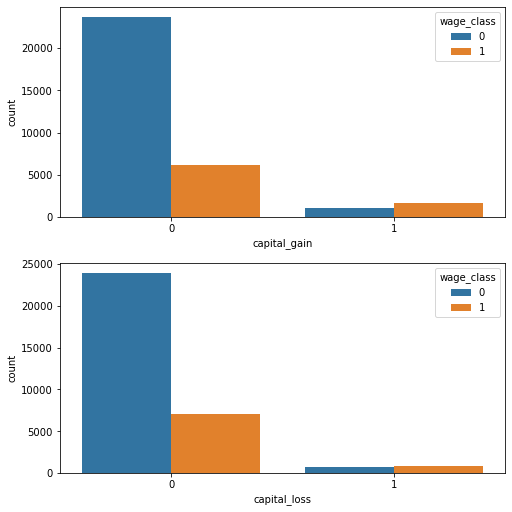

In [5]:
d1 = data[['capital_gain', 'capital_loss', 'wage_class']]

d1['capital_gain'] = d1['capital_gain'].apply(lambda x: 1 if x>0 else 0)
d1['capital_loss'] = d1['capital_loss'].apply(lambda x: 1 if x>0 else 0)
wages = {' <=50K':0, ' >50K':1}
d1['wage_class'] = d1['wage_class'].map(wages)

fig,ax = plt.subplots(2,1,figsize=(7,7),constrained_layout=True)
sns.countplot(x='capital_gain',hue='wage_class',data=d1,ax=ax[0])
sns.countplot(x='capital_loss',hue='wage_class',data=d1,ax=ax[1])

#### Notes: <br>
1. fnlwgt has almost no significant relationship with the wage_class
2. education and hours_per_week are strongly related to the wage_class
3. age is correlated to wage_class but not as strong when looked at mid-age
4. Ratio of wage_class >50K is higher when capital_gain/capital_loss are present

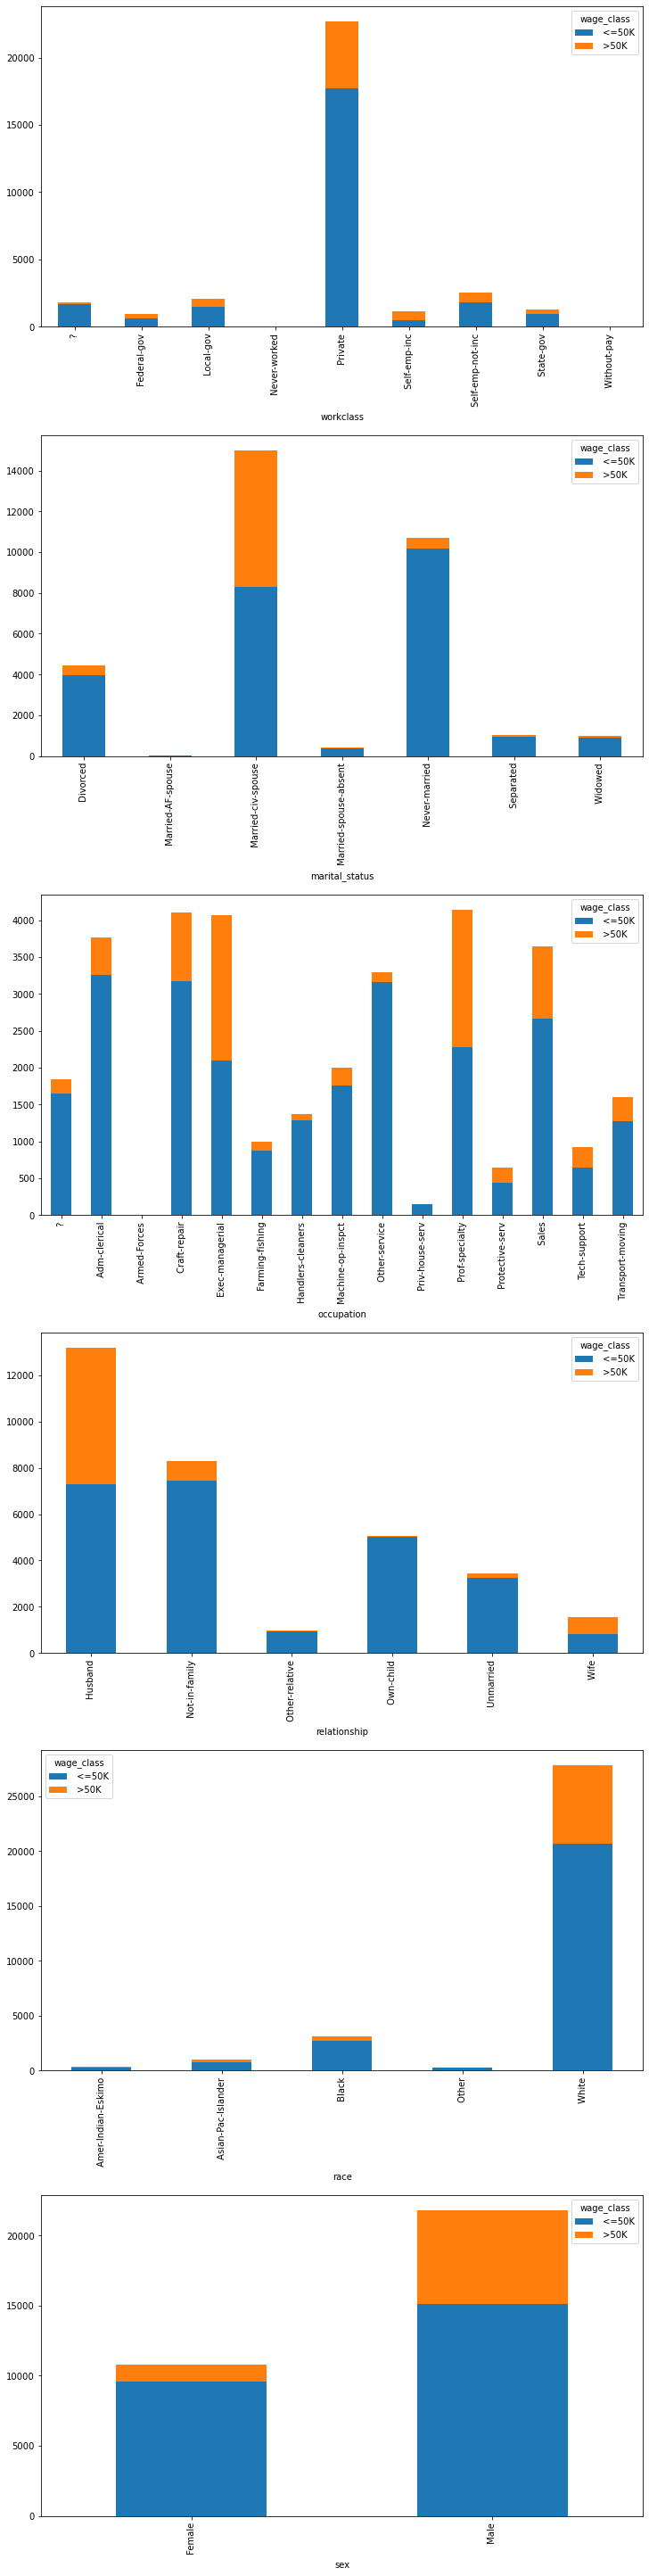

In [6]:
col = ['workclass','marital_status','occupation','relationship','race','sex']

fig,ax = plt.subplots(6,1,figsize=(10,40),constrained_layout=True)

for a in range(0,6):
    c = col[a]
    dt = data.groupby([c,'wage_class'])['wage_class'].count().unstack()
    dt.plot(kind='bar',stacked=True,ax=ax[a])

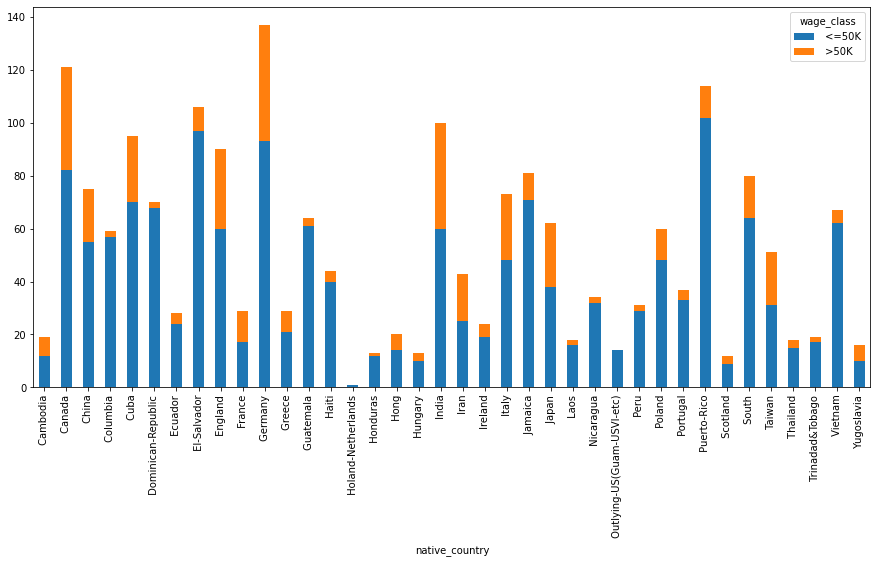

In [7]:
fig,ax = plt.subplots(1,1,figsize=(15,7))
countries = [' United-States',' Mexico',' ?',' Philippines']
non_us = data[~(data['native_country'].isin(countries))]
dt = non_us.groupby(['native_country','wage_class'])['wage_class'].count().unstack()
dt.plot(kind='bar',stacked=True,ax=ax);

#### Notes: <br>
1. native_country relationship with the wage_class could not be determined with US, Mexico, Philippines and unknown(?) data present. Removed them to view the relationsip, wage_class divide from some countries are more than others
2. all other categorical variables are also related to the wage_class

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

#'fnlwgt', 'capital_gain', 'capital_loss','education'
wages = {' <=50K':0, ' >50K':1}
X = data.drop(columns=['education','wage_class'],axis=1)
y = data['wage_class'].map(wages)
le = LabelEncoder()
cols = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
for i in cols:
    X[i] = le.fit_transform(X[i])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from time import time
from sklearn.feature_selection import RFE, SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.model_selection import RandomizedSearchCV

models = []
models.append(('LR', LogisticRegression()))
models.append(('SGD', SGDClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVC', SVC()))
models.append(('XGB', XGBClassifier(verbosity=0)))
models.append(('RF', RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))

for name, model in models:
    start = time()
    kfold = RepeatedStratifiedKFold(n_splits=10, random_state=42, n_repeats=5)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name, round(cv_results*100,4), round(accuracy_score(y_test,y_pred)*100,4), round(time()-start,4))

LR 79.0277 79.4247 19.2952
SGD 70.1457 79.6499 35.1568
KNN 77.704 77.8688 26.3896
DT 81.0288 80.9807 9.2224
NB 79.5184 79.9365 1.3016
XGB 87.0876 87.0816 102.8317
RF 85.9144 85.5666 183.6014
LDA 81.3243 81.5129 4.8413


#### Notes:

1. XGB chosen due to high accuracy in 10-fold and single run for validation
2. SVC excluded due to very high runtime, and not the best fit here

In [10]:
#cv = RepeatedStratifiedKFold(n_splits=10, random_state=42, n_repeats=3)
model = XGBClassifier(verbosity=0)
space = dict()
space['n_estimators'] = [1,5,10,25,50,100]
space['max_depth'] = [1,5,10,25,50]
space['learning_rate '] = [0.00001,0.0001,0.001,0.01,0.1,1,10]
space['booster'] = ['gbtree', 'gblinear', 'dart']
space['gamma'] = [1,2,3,4]
space['reg_alpha'] = [1,2,3,4]
space['reg_lambda'] = [1,2,3,4]
search = RandomizedSearchCV(model, space, n_iter=50, scoring='accuracy', n_jobs=-1, random_state=1)
result = search.fit(X, y)
print(round(result.best_score_*100,4), result.best_params_)
best_params = result.best_params_

87.3284 {'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 50, 'max_depth': 5, 'learning_rate ': 1, 'gamma': 1, 'booster': 'gbtree'}


In [11]:
model = XGBClassifier(verbosity=0,reg_lambda=2,reg_alpha=1,n_estimators=50,max_depth=5,learning_rate=1,gamma=1,booster='gbtree')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(round(accuracy_score(y_test,y_pred)*100,4))
importance = pd.DataFrame(model.feature_importances_,columns=['XGB_Importance'])
features = pd.DataFrame(X.columns, columns=['Feature'])
pd.concat([features,importance],axis=1).nlargest(5,importance)

86.2627


,Feature,XGB_Importance
6,relationship,0.477205
9,capital_gain,0.157776
3,education_num,0.093775
10,capital_loss,0.075389
0,age,0.037097


In [12]:
rfe = RFE(model, 5)
fit = rfe.fit(X, y)
ranks = pd.DataFrame(fit.ranking_,columns=['RFE_Rank'])
features = pd.DataFrame(X.columns, columns=['Feature'])
pd.concat([features,ranks],axis=1).nsmallest(5,ranks)

,Feature,RFE_Rank
0,age,1
3,education_num,1
6,relationship,1
9,capital_gain,1
10,capital_loss,1


In [13]:
KC = SelectKBest(score_func=chi2,k='all')
fit = KC.fit(X,y)
score = pd.DataFrame(fit.scores_.round(2),columns=['Chi2_Score'])
features = pd.DataFrame(X.columns, columns=['Feature'])
pd.concat([features,score],axis=1).nlargest(5,score)

,Feature,Chi2_Score
9,capital_gain,82192467.14
10,capital_loss,1372145.89
2,fnlwgt,171147.68
0,age,8600.61
11,hours_per_week,6476.41


In [14]:
KM = SelectKBest(score_func=mutual_info_classif,k='all')
fit = KM.fit(X,y)
score = pd.DataFrame(fit.scores_.round(4),columns=['Mutual_classif_Score'])
features = pd.DataFrame(X.columns, columns=['Feature'])
pd.concat([features,score],axis=1).nlargest(5,score)

,Feature,Mutual_classif_Score
6,relationship,0.1150
4,marital_status,0.1113
9,capital_gain,0.0807
0,age,0.0698
5,occupation,0.0678


In [15]:
KF = SelectKBest(score_func=f_classif,k='all')
fit = KF.fit(X,y)
score = pd.DataFrame(fit.scores_.round(4),columns=['f_classifScore'])
features = pd.DataFrame(X.columns, columns=['Feature'])
pd.concat([features,score],axis=1).nlargest(5,score)

,Feature,f_classifScore
3,education_num,4120.0958
6,relationship,2187.6458
0,age,1886.7073
11,hours_per_week,1813.3863
9,capital_gain,1709.1501


#### Note: 

Based on various feature selection/ feature importance techniques, (relationship, education_num, marital_status, capital_gain, capital_loss, age) are the most important features observed with at least 3 occurences across the methods

In [16]:
X_train_selected = X_train[['relationship', 'education_num', 'marital_status', 'capital_gain', 'capital_loss', 'age']]
X_test_selected = X_test[['relationship', 'education_num', 'marital_status', 'capital_gain', 'capital_loss', 'age']]
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
print(round(accuracy_score(y_test,y_pred)*100,4))

85.9863


#### Note: 
Accuracy changed from 86.2627 to 85.9863 after feature selection, not a major drop

## Using test data to validate

In [17]:
#Loading the file
test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',skiprows=1,header=None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
test.columns = col_labels

#Data pre-processing
wages = {' <=50K.':0, ' >50K.':1}
X = test.drop(columns=['education','wage_class'],axis=1)
y = test['wage_class'].map(wages)
le = LabelEncoder()
cols = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
for i in cols:
    X[i] = le.fit_transform(X[i])
    
X_selected = X[['relationship', 'education_num', 'marital_status', 'capital_gain', 'capital_loss', 'age']]
y_pred = model.predict(X_selected)
print(round(accuracy_score(y,y_pred)*100,4))

86.0635


#### Note:

Accuracy remains at 86.0635 with the test data